## 2.6. Raízes de polinômios


### Método de Briot-Ruffini para divisão de polinômios

Dados os polinômios
$$
P(x)=a_0 x^n+a_1 x^{n-1}+\cdots+a_n
$$
e
$$
Q(x)=b_0 x^{n-1}+b_1 x^{n-2}+\cdots+b_{n-1}
$$

tal que $P(x)=(x-\alpha) Q(x)+P(\alpha)$, ou seja, $Q(x)$ é o polinômio resultante da divisão de $P(x)$ por $(x-\alpha)$ $P(\alpha)$ é o resto. 

Podemos determinar $Q(x)$ e $P(\alpha)$ usando o método de Briot-Ruffini escrevendo

$$
\begin{array}{r}
{\left[a_0 x^n+a_1 x^{n-1}+\cdots+a_n\right]=(x-\alpha)\left[b_0 x^{n-1}+b_1 x^{n-2}+\cdots+b_{n-1}\right]+b_n} \\
=b_0 x^n+\left(b_1-\alpha b_0\right) x^{n-1}+\left(b_2-\alpha b_1\right) x^{n-2}+ \\
+\cdots+\left(b_{n-1}-\alpha b_{n-2}\right) x+\left(b_n-\alpha b_{n-1}\right)
\end{array}
$$

que leva a 

$$
\begin{array}{cll}
a_0=b_0 & \rightarrow & b_0=a_0 \\
a_1=b_1-\alpha b_0 & \rightarrow & b_1=a_1+\alpha b_0 \\
\vdots & & \\
a_{n-1}=b_{n-1}-\alpha b_{n-2} & \rightarrow & b_{n-1}=a_{n-1}+\alpha b_{n-2} \\
a_n=b_n-\alpha b_{n-1} & \rightarrow & b_n=a_n+\alpha b_{n-1}
\end{array}
$$


Vejamos o seguinte exemplo:

**Exemplo 2.6.3:** (Arenales e Darezzo, 2016) Seja $P(x)=6 x^3+x-1$, calcule $P(3)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4,3]

In [2]:
def BriotRuffini(a,alpha):
    q = a.copy()
    for i in range(1,len(a)):
         q[i] = alpha*q[i-1] + a[i]
    return q

In [3]:
an = [6,0,1,-1] 
bn = BriotRuffini(an , 3)

print ('Coeficientes de Q(x):', bn[:-1] )
print ('Resto: P(3)=', bn[-1])

Coeficientes de Q(x): [6, 18, 55]
Resto: P(3)= 164


Podemos também obter a derivada $P'(\alpha)$ pelo método de Briot-Ruffini, pois como

$$P(x)=(x-\alpha) Q(x)+P(\alpha)$$

temos que 

$$P'(x)=(x-\alpha) Q'(x) + Q(x)$$

Assim, para $x=\alpha$, tem-se que $P'(\alpha)=Q(\alpha)$. Ou seja, para calcular $P'(\alpha)$ precisamos obter o resto da divisão de $Q(x)$ por $(x-\alpha)$, o que pode ser feito usando Briot-Ruffini uma segunda vez.

**Exemplo 2.6.4:** (Arenales e Darezzo, 2016) Seja $P(x)=6 x^3+x-1$, calcule $P'(3)$.

In [4]:
cn = BriotRuffini(bn[:-1] , 3)
print ("P'(3)=", cn[-1])

P'(3)= 163


### Método de Newton com Briot-Ruffini

Vamos agora obter zeros de polinômios pelo método iterativo de Newton 

$$
x_{i+1}=x_i-\frac{P\left(x_i\right)}{P^{\prime}\left(x_i\right)}
$$

usando Briot-Ruffini para calcular $P(x_i)$ e $P'(x_i)$ a cada iteração.

**Exemplo 2.6.7:**  (Arenales e Darezzo, 2016) Determine uma raiz da equação $P(x)=x^3+2 x^2-x-2=0$ usando o método de Newton mais Briot-Ruffini, com $\varepsilon=0.001$

In [5]:
a = np.array([1.,2.,-1.,-2.])
x = 2.
x_ant = x

def IteraNewton(a,x):
    q = BriotRuffini(a,x)
    m = BriotRuffini(q[0:-1],x)
    return (x - q[-1]/m[-1])

In [6]:
# uma iteração
IteraNewton(a,x)

1.368421052631579

In [7]:
# iterando até atingir a precisão
err = 1.
x = 2.
while err>0.001:
    x = IteraNewton(a,x)
    err = abs(x-x_ant)/abs(x)
    x_ant = x
    print("x=",x, 'Erro:', err)

x= 1.368421052631579 Erro: 0.4615384615384615
x= 1.077163124665906 Erro: 0.27039351913946175
x= 1.0045201633201402 Erro: 0.07231608084965287
x= 1.0000169296346983 Erro: 0.004503157448631215
x= 1.0000000002388385 Erro: 1.6929395855800372e-05



**Exemplo2.6.8:**  (Arenales e Darezzo, 2016) Encontre as raízes de 
$P(x)=x^3+8 x^2-4 x-2=0$.



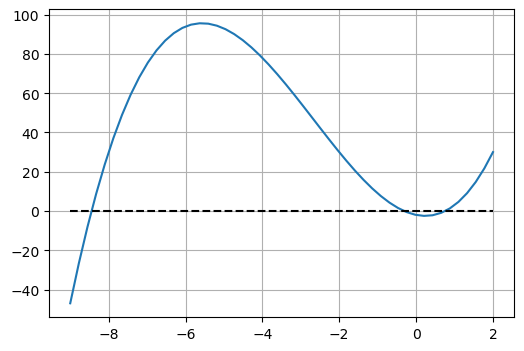

In [8]:
a = [1,8,-4,-2]
x = np.linspace(-9,2)

plt.figure(figsize=(6,4))
plt.plot(x, np.polyval(a, x))
plt.plot(x, np.zeros(len(x)), 'k--')
plt.grid()

In [9]:
# iterando até atingir a precisão
err = 1.
x = 1.
while err>0.001:
    x = IteraNewton(a,x)
    err = abs(x-x_ant)/abs(x)
    x_ant = x
    print("x=",x, 'Erro:', err)

x= 0.8 Erro: 0.2500000002985481
x= 0.7597014925373134 Erro: 0.053045186640471545
x= 0.7579998221716971 Erro: 0.002244948238564167
x= 0.7579968013604806 Erro: 3.985255889050246e-06


In [10]:
# iterando até atingir a precisão
err = 1.
x = -1.
while err>0.001:
    x = IteraNewton(a,x)
    err = abs(x-x_ant)/abs(x)
    x_ant = x
    print("x=",x, 'Erro:', err)

x= -0.47058823529411764 Erro: 2.6107432028910216
x= -0.3279505432746347 Erro: 0.43493659316805666
x= -0.31260601722010856 Erro: 0.04908583075584857
x= -0.3124159051406068 Erro: 0.000608522409946434


In [11]:
# iterando até atingir a precisão
err = 1.
x = -7.
while err>0.001:
    x = IteraNewton(a,x)
    err = abs(x-x_ant)/abs(x)
    x_ant = x
    print("x=",x, 'Erro:', err)

x= -9.419354838709678 Erro: 0.9668325580158944
x= -8.609635740090033 Erro: 0.09404800888953495
x= -8.451477874162121 Erro: 0.0187136342640655
x= -8.4455889629375 Erro: 0.0006972765606359088


**Exercícios:**
*1.* Calcule, se possível, as raízes dos seguintes polinômios com pelo menos 5 casas de precisão:

a) $P(x) = x^3-7x^2+14x-6=0$  

b) $P(x) = –25 + 82x – 90x^2 + 44x^3 – 8x^4 + 0.7x^5$

c) $P(x) = – 12 – 21x + 18x^2 – 2.75x^3$

